![Texto alternativo](img/Toolbox_ML_Banner_3.png)

## Imports

In [2]:
import warnings
warnings.filterwarnings("ignore")

from Toolbox_ML_II import *

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

## Data

#### Boston

In [3]:
# Cargar dataset
boston = pd.read_csv("./data/obligatoria_hard.csv", sep="|")

# Seleccionar variables numéricas
num_features_boston = boston.select_dtypes(include = [np.number]).columns.tolist()
num_features_boston.remove("MEDV")  # Excluir target

# Entrenar modelo
target_boston = boston["MEDV"]
predicciones_boston = DecisionTreeRegressor().fit(boston[num_features_boston], target_boston).predict(boston[num_features_boston])

#### Iris

In [4]:
# Cargar dataset
iris = pd.read_csv("./data/iris.csv")

# Seleccionar variables numéricas
num_features_iris = iris.select_dtypes(include = [np.number]).columns.tolist()

# Entrenar modelo
target_iris = iris["species"]
predicciones_iris = LogisticRegression(max_iter = 200).fit(iris[num_features_iris], target_iris).predict(iris[num_features_iris])

#### Titanic

In [5]:
# Cargar dataset
titanic = pd.read_csv("./data/titanic.csv")

# Transformar variables categóricas
titanic = pd.get_dummies(titanic, columns = ["sex", "class", "who", "embark_town"], drop_first = True)

# Seleccionar X e y
X_titanic = titanic.drop(columns = ["alive"])
y_titanic = titanic["alive"]

# Dividir en train y test
X_train_titanic, X_test_titanic, y_train_titanic, y_test_titanic = train_test_split(X_titanic, y_titanic, test_size = 0.2, random_state = 42)

# Entrenar el modelo
predicciones_titanic = LogisticRegression(max_iter = 1000).fit(X_train_titanic, y_train_titanic).predict(X_test_titanic)

## Función | eval_model

#### Boston

RMSE: 0.0
MAE: 0.0
MAPE: 0.0


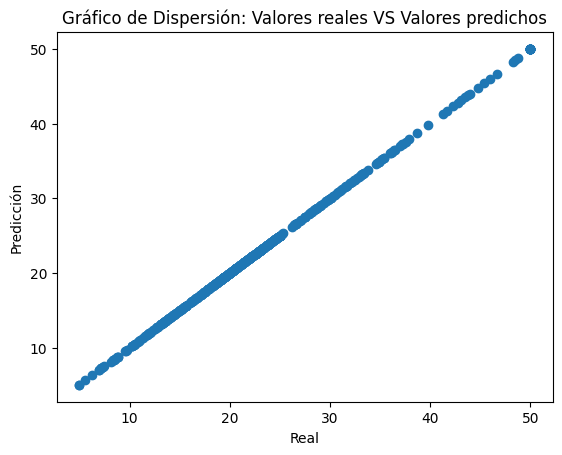

(0.0, 0.0, 0.0)

In [6]:
eval_model(target_boston, predicciones_boston, tipo_de_problema = "regresion", metricas = ["RMSE", "MAE", "MAPE", "GRAPH"])

In [17]:
eval_model(target_boston, predicciones_boston, tipo_de_problema = "sumatoria", metricas = ["RMSE", "MAE", "MAPE", "GRAPH"])

ValueError: El tipo de problema debe ser de regresión o clasificación

In [22]:
eval_model(target_boston, predicciones_boston, tipo_de_problema = "sumatoria")

TypeError: eval_model() missing 1 required positional argument: 'metricas'

#### Iris

In [16]:
eval_model(target_iris, predicciones_iris, tipo_de_problema = "clasificacion", metricas = ["ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX"])

Accuracy: 0.9733333333333334
Precision: 0.9738247863247862
Recall: 0.9733333333333333
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        50
  versicolor       0.98      0.94      0.96        50
   virginica       0.94      0.98      0.96        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150

Confusion Matrix (Absolute Values):
[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


(0.9733333333333334, 0.9738247863247862, 0.9733333333333333)

#### Titanic

Accuracy: 0.8100558659217877
Precision: 0.8069687334393216
Recall: 0.7981981981981983
Classification Report:
              precision    recall  f1-score   support

          no       0.82      0.87      0.84       105
         yes       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Confusion Matrix (Absolute Values):
[[91 14]
 [20 54]]


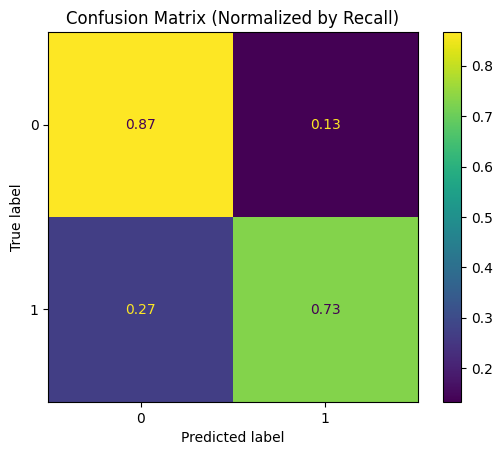

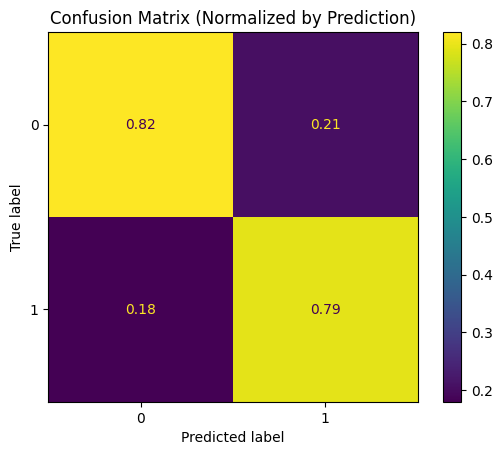

(0.8100558659217877, 0.8069687334393216, 0.7981981981981983)

In [ ]:
eval_model(y_test_titanic, predicciones_titanic, "clasificacion", metricas = ["ACCURACY", "PRECISION", "RECALL", "CLASS_REPORT", "MATRIX", "MATRIX_RECALL", "MATRIX_PRED"])

## Función | get_features_num_classification

#### Boston

In [30]:
get_features_num_classification(boston, target_col = "ZN", columns = ["RM", "INDUS"])

['RM', 'INDUS']

In [31]:
get_features_num_classification(boston, target_col = "TAX")

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

#### Iris

In [ ]:
get_features_num_classification(iris, target_col = "species")

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [35]:
get_features_num_classification(iris)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [36]:
get_features_num_classification(iris, columns = ["petal_length", "sepal_width"])

['petal_length', 'sepal_width']

#### Titanic

In [34]:
get_features_num_classification(titanic, target_col = "alive", pvalue = 0.003)

['fare']

In [37]:
get_features_num_classification(titanic, target_col = "camarote", pvalue = 0.003)

ValueError: camarote no está en el dataframe

## Función | plot_features_num_classification

#### Boston

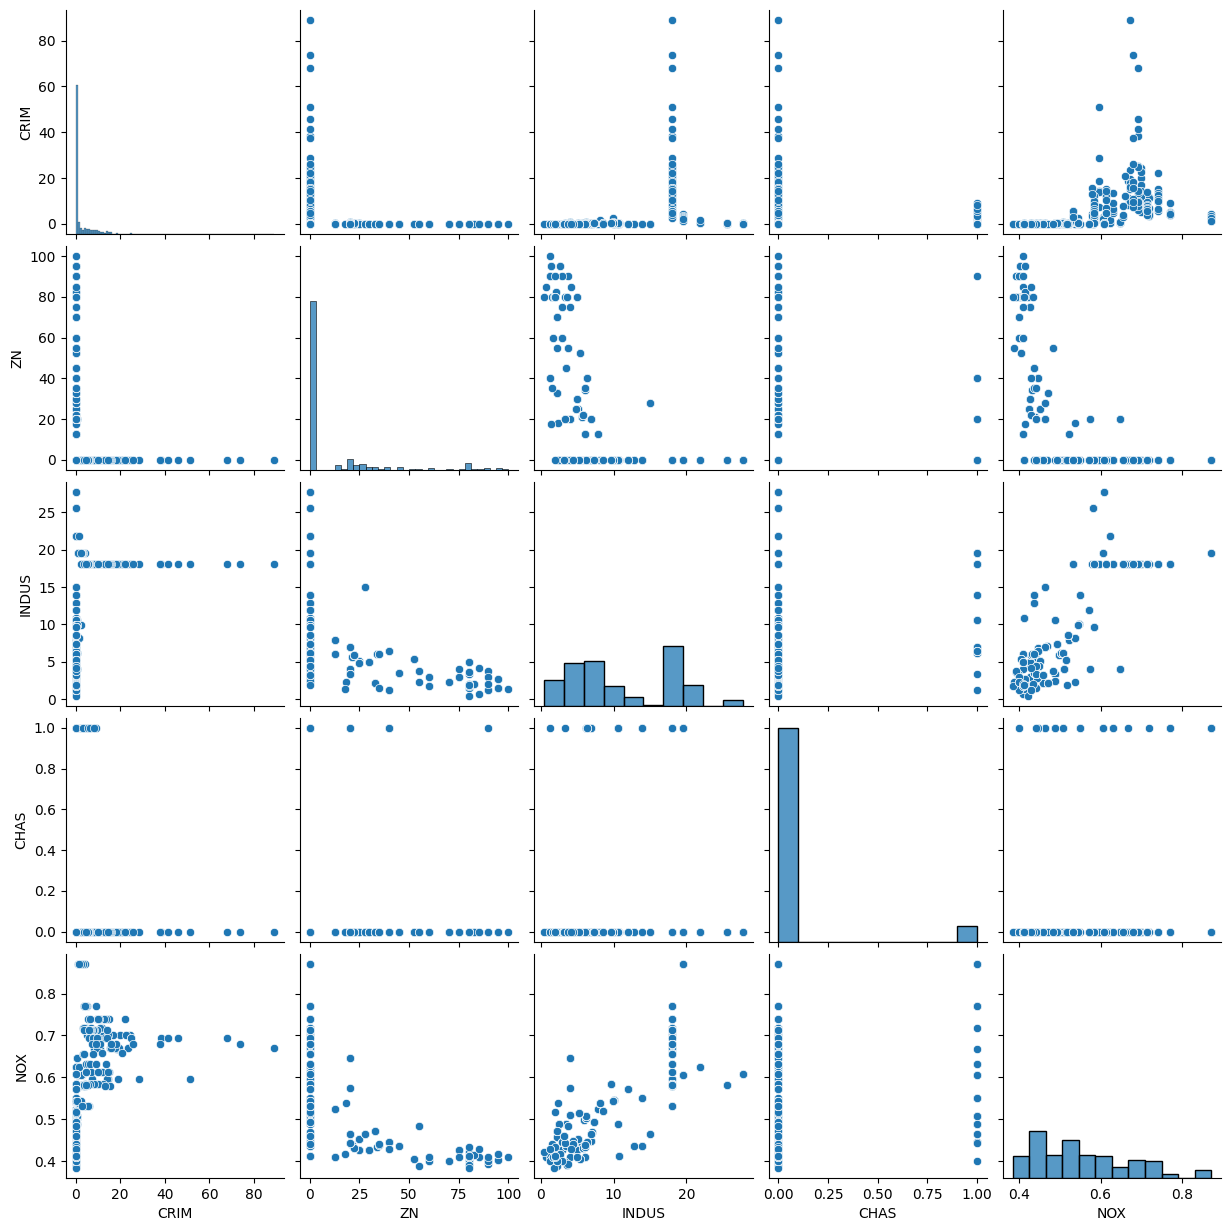

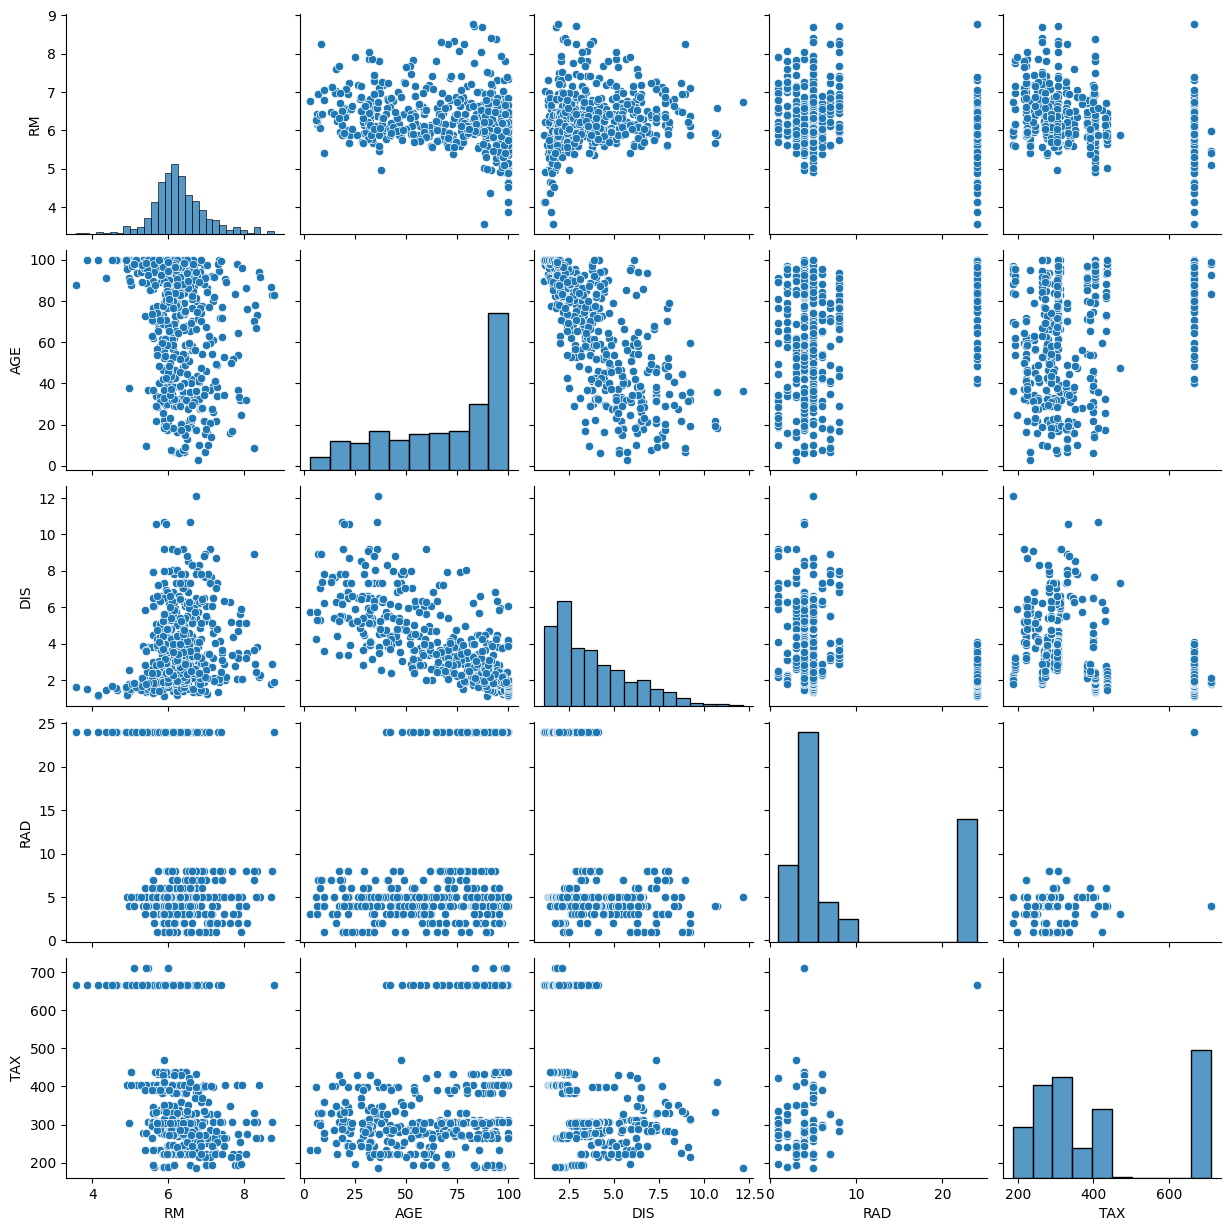

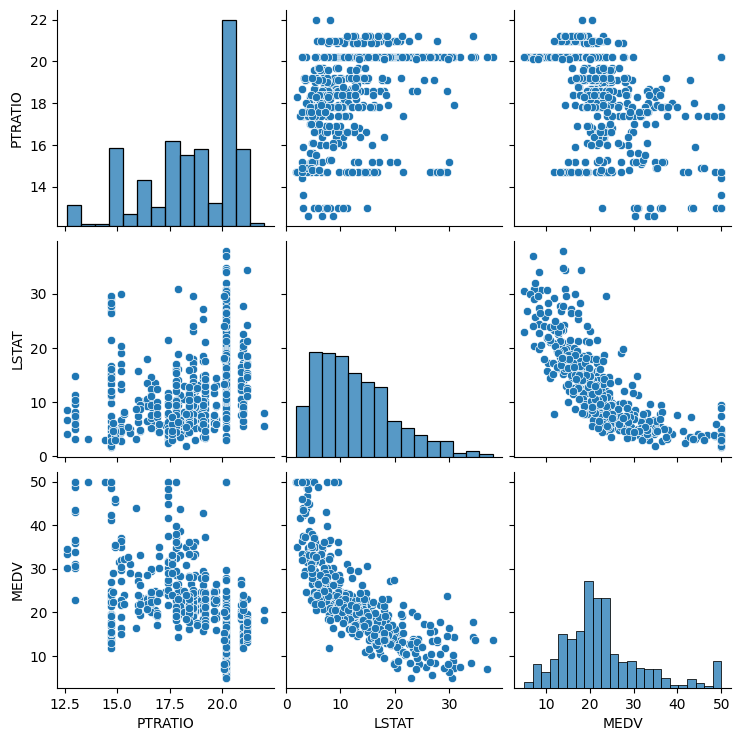

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [43]:
plot_features_num_classification(boston, pvalue = 0.00000001)

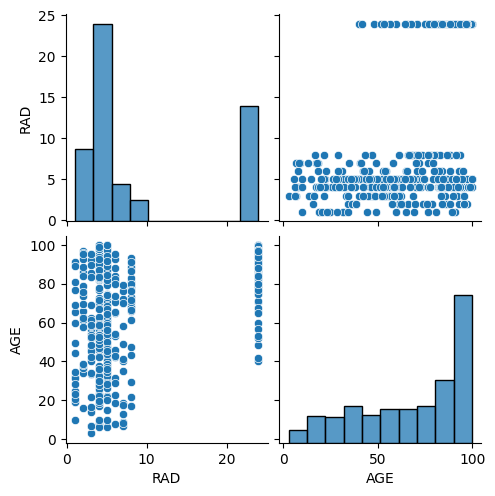

['RAD', 'AGE']

In [57]:
plot_features_num_classification(boston, columns = ["RAD", "AGE"])

#### Iris

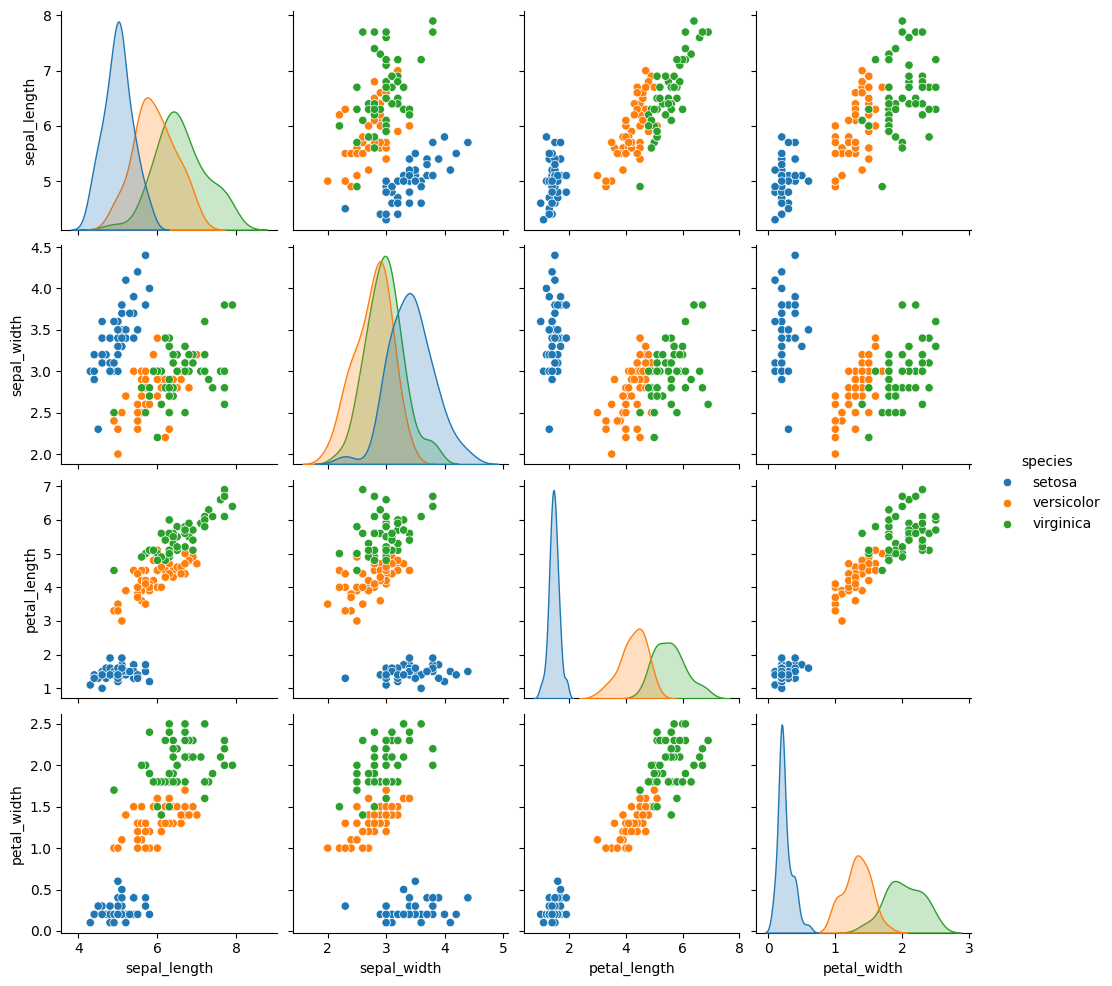

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [44]:
plot_features_num_classification(iris, target_col = "species")

#### Titanic

In [50]:
plot_features_num_classification(titanic, target_col = "alive", columns = ["who"])

KeyError: 'who'

In [52]:
plot_features_num_classification(titanic, target_col = "alive", columns = ["age"], pvalue = "M")

ValueError: pvalue debe ser un número entre 0 y 1

In [56]:
plot_features_num_classification(titanic, target_col = "camarote")

ValueError: camarote no está en el dataframe

## Función | get_features_cat_classification

#### Titanic

In [ ]:
get_features_cat_classification(titanic, "muerto")

La columna 'muerto' no está en el DataFrame.


In [ ]:
get_features_cat_classification(titanic, "sex_male", normalize = True, mi_threshold = -0.5)

El argumento 'mi_threshold' debe estar entre 0 y 1 cuando 'normalize' es True.


In [ ]:
get_features_cat_classification(titanic, "alive", normalize = True, mi_threshold = 0.1)

La columna 'alive' debe ser de tipo categórico.


## Función | plot_features_cat_classification

#### Titanic

In [ ]:
plot_features_cat_classification(titanic, "alive", mi_threshold = 0.15)

No se encontraron columnas categóricas válidas en la lista proporcionada.


## Función | super_selector

#### Iris

In [ ]:
selectores = {
    "KBest" : 3,
    "FromModel" : (DecisionTreeClassifier(), 3),
    "RFE" : (LogisticRegression(max_iter = 200), 3, 1),
    "SFS" : (LogisticRegression(max_iter = 200), 3)
}

super_selector(iris, target_col = "species", selectores = selectores)

{'KBest': ['sepal_length', 'petal_length', 'petal_width'],
 'FromModel': ['sepal_length', 'petal_length', 'petal_width'],
 'RFE': ['sepal_width', 'petal_length', 'petal_width'],
 'SFS': ['sepal_length', 'petal_length', 'petal_width'],
 'hard_voting': ['petal_length', 'petal_width', 'sepal_length']}

#### Titanic

In [ ]:
selectores = {
    "KBest" : 5,
    "FromModel" : (RandomForestClassifier(), 0.01),
    "RFE" : (RandomForestClassifier(), 5, 1),
    "SFS" : (RandomForestClassifier(), 5)
}

super_selector(titanic, target_col = "alive", selectores = selectores)

{'KBest': ['adult_male', 'sex_male', 'class_Third', 'who_man', 'who_woman'],
 'FromModel': ['age',
  'sibsp',
  'parch',
  'fare',
  'adult_male',
  'alone',
  'sex_male',
  'class_Second',
  'class_Third',
  'who_man',
  'who_woman',
  'embark_town_Southampton'],
 'RFE': ['age', 'fare', 'adult_male', 'sex_male', 'who_man'],
 'SFS': ['fare',
  'adult_male',
  'class_Second',
  'class_Third',
  'embark_town_Queenstown'],
 'hard_voting': ['adult_male',
  'sex_male',
  'class_Third',
  'who_man',
  'fare',
  'who_woman',
  'age',
  'class_Second']}